In [29]:
# imports and  Data loading  
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# Load dataset

spam_df = pd.read_csv("C:/Users/JARE WORKS/Documents/ml_PROJECTS/Spam Email Detection Using Machine Learning (Text Classification)\SPAM text message 20170820 - Data.csv", encoding='latin-1')
spam_df.columns = ["Category", "Message"]
spam_df.head(1000)

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\JARE WORKS\AppData\Local\Temp\ipykernel_9548\2131122453.py:12: SyntaxWarning: invalid escape sequence '\S'
  spam_df = pd.read_csv("C:/Users/JARE WORKS/Documents/ml_PROJECTS/Spam Email Detection Using Machine Learning (Text Classification)\SPAM text message 20170820 - Data.csv", encoding='latin-1')


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
995,ham,"I can't, I don't have her number!"
996,ham,Change again... It's e one next to escalator...
997,ham,Yetunde i'm in class can you not run water on ...
998,ham,Not a lot has happened here. Feels very quiet....


In [24]:
# Display dataset information
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [36]:
# train-test split
X = spam_df['Category']
y = spam_df['Message']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Text Vectorization using TF-IDF
# Build pipeline: TF-IDF -> SVM
model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("svm", svm.SVC(kernel="linear"))
])

# Train the model
model.fit(X_train, y_train)

# BASELINE MODEL EVALUATION
y_preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.008968609865470852
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# model hyperparameter tuning using ranomized search CV
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [1, 0.1, 0.01, 0.001],
    "svm__kernel": ["linear", "rbf", "poly"]
}
random_search = RandomizedSearchCV(model,
                                    param_distributions=param_dist, 
                                    n_iter=10, 
                                    cv=5, 
                                    verbose=2, 
                                    n_jobs=-1)
random_search.fit(X_train, y_train);""

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\JARE WORKS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


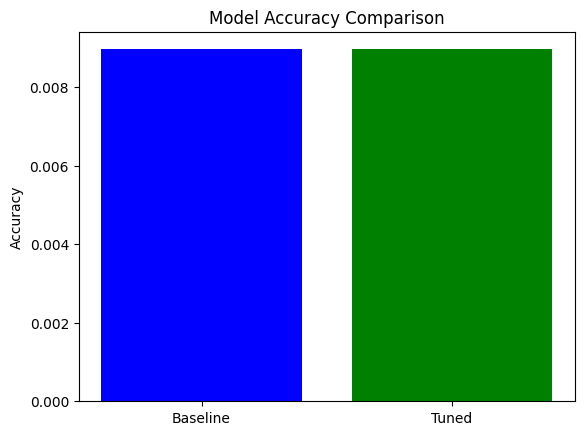

In [35]:

# combined model acurracy graphs between baseline and tuned model
labels = ['Baseline', 'Tuned']
accuracy = [accuracy_score(y_test, y_preds), accuracy_score(y_test, y_preds_tuned)]
import matplotlib.pyplot as plt
x = np.arange(len(labels))
plt.bar(x, accuracy, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

